In [2]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 31.4 MB/s eta 0:00:00


### **Do not forget to connect to GPU runtime before training**

In [4]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


In [6]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [7]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)
print(type(datagen))
# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')


<class 'keras.preprocessing.image.ImageDataGenerator'>


## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [8]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


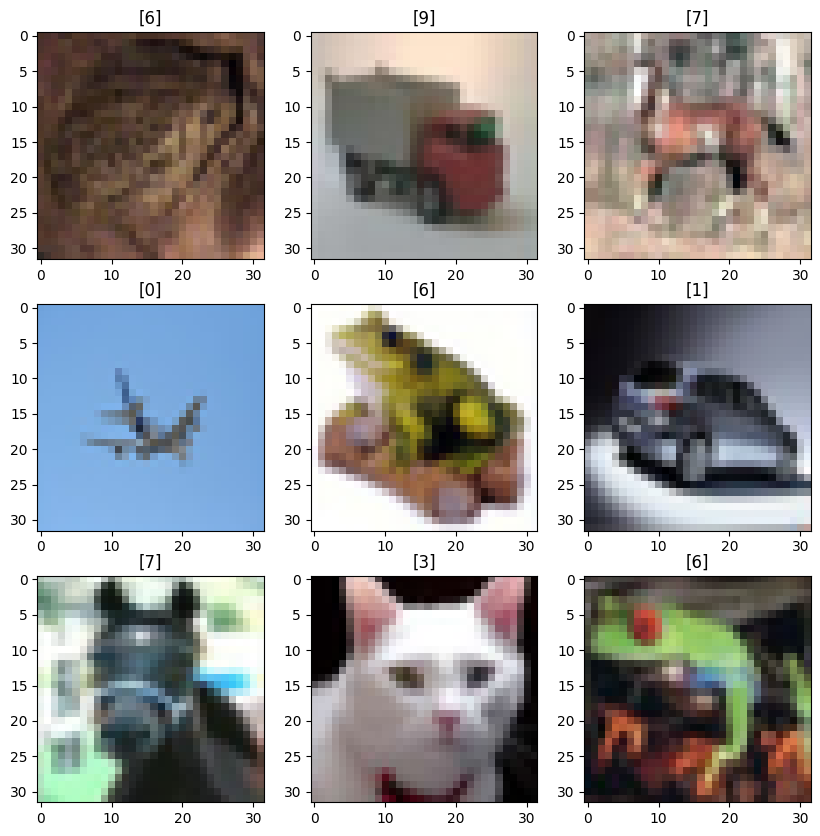

In [9]:
import random
figure = plt.figure(figsize=(10,10))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  imgplot = plt.imshow(X_train[index], cmap='hot')
  plt.title(Y_train[index])

In [10]:
unique, counts = np.unique(Y_train, return_counts = True)
for i in range(unique.shape[0]):
  print(unique[i], " - ", counts[i])

0  -  3488
1  -  3483
2  -  3535
3  -  3535
4  -  3510
5  -  3487
6  -  3450
7  -  3510
8  -  3468
9  -  3534


In [11]:
model_cnn = tf.keras.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(26, (3,3), activation = 'relu', input_shape=(32,32,3)))
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model_cnn.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model_cnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [13]:
history = model_cnn.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 45s 31ms/step - loss: 1.7833 - accuracy: 0.1190 - val_loss: 1.5603 - val_accuracy: 0.0999
Epoch 2/10
1094/1094 [==============================] - 34s 31ms/step - loss: 1.5451 - accuracy: 0.0988 - val_loss: 1.4883 - val_accuracy: 0.0711
Epoch 3/10
1094/1094 [==============================] - 33s 30ms/step - loss: 1.4624 - accuracy: 0.0968 - val_loss: 1.4096 - val_accuracy: 0.1107
Epoch 4/10
1094/1094 [==============================] - 32s 29ms/step - loss: 1.4092 - accuracy: 0.0979 - val_loss: 1.3615 - val_accuracy: 0.1094
Epoch 5/10
1094/1094 [==============================] - 48s 44ms/step - loss: 1.3595 - accuracy: 0.0944 - val_loss: 1.3401 - val_accuracy: 0.0757
Epoch 6/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.3227 - accuracy: 0.0960 - val_loss: 1.2917 - val_accuracy: 0.1400
Epoch 7/10
1094/1094 [==============================] - 46s 42ms/step - loss: 1.2991 - accuracy: 0.0972 - val_loss: 1.2989 - val_accura

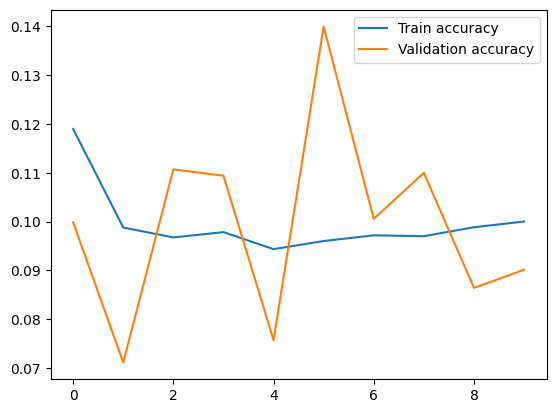

In [15]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [16]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [35]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: The batch normalization method is used to make the training of the neural networks faster through normalizing the input layers by rescaling and re-centering.
Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per mini-batch and using these
statistics to perform the standardization. A typical neural network is trained using a collected set of input data called batch. Normalization means to have a mean of zero
and a standard deviation of one. Batch normalization means that this normalization process occurs batch-wise. Batches are the iterative seta in one epoch.

By Normalizing the hidden layer activation the Batch normalization speeds up the training process.



"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: The batch normalization method is used to make the training of the neural networks faster through normalizing the input layers by rescaling and re-centering.\nBatch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per mini-batch and using these \nstatistics to perform the standardization. A typical neural network is trained using a collected set of input data called batch. Normalization means to have a mean of zero \nand a standard deviation of one. Batch normalization means that this normalization process occurs batch-wise. Batches are the iterative seta in one epoch. \n\nBy Normalizing the hidden layer activation the Batch normalization speeds up the training process.\n\n\n\n'

In [18]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [19]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers


model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))


model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))




# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

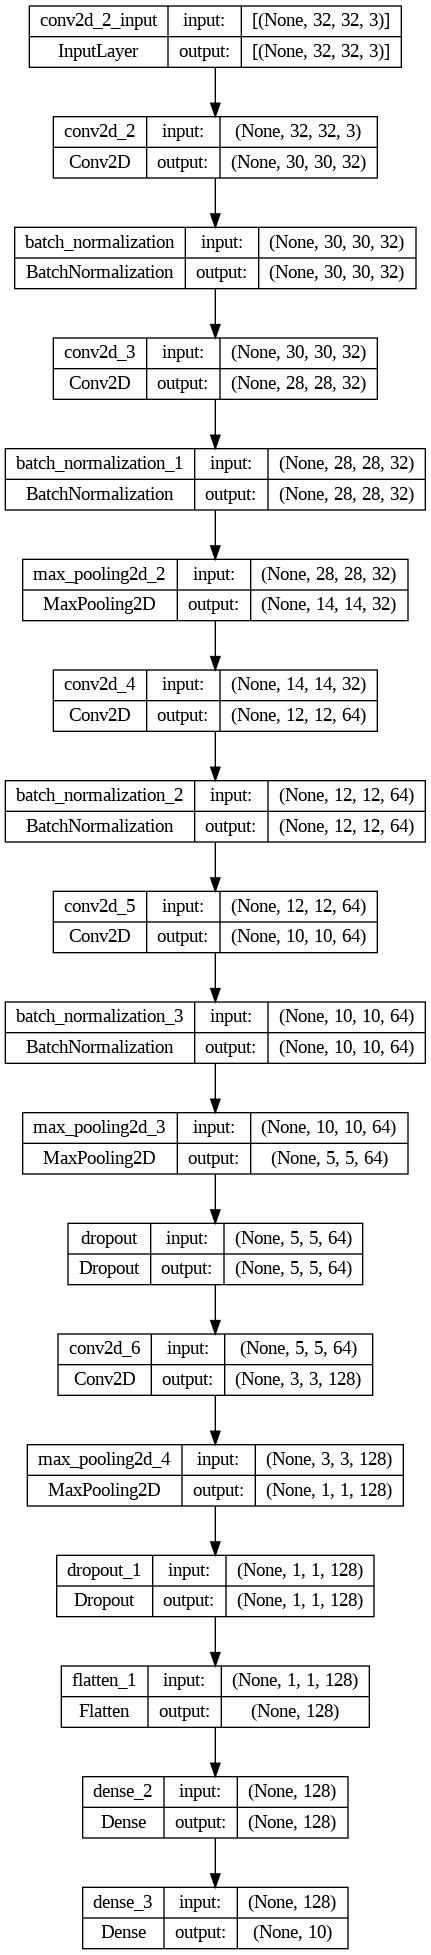

In [21]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

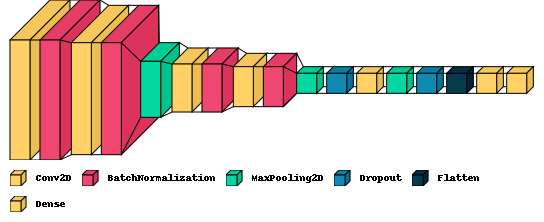

In [22]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [24]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [26]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

steps = int(X_train.shape[0] / 128)
history = model.fit(augmented_images, steps_per_epoch = steps, epochs=20,validation_data = validation_data)


Epoch 1/20
273/273 [==============================] - 13s 48ms/step - loss: 1.6282 - accuracy: 0.0928 - val_loss: 1.6750 - val_accuracy: 0.0751
Epoch 2/20
273/273 [==============================] - 12s 45ms/step - loss: 1.5893 - accuracy: 0.1008 - val_loss: 1.5295 - val_accuracy: 0.1230
Epoch 3/20
273/273 [==============================] - 12s 45ms/step - loss: 1.5506 - accuracy: 0.1074 - val_loss: 1.5215 - val_accuracy: 0.0376
Epoch 4/20
273/273 [==============================] - 12s 45ms/step - loss: 1.5095 - accuracy: 0.1003 - val_loss: 1.5491 - val_accuracy: 0.0441
Epoch 5/20
273/273 [==============================] - 13s 47ms/step - loss: 1.4662 - accuracy: 0.1029 - val_loss: 1.5437 - val_accuracy: 0.0806
Epoch 6/20
273/273 [==============================] - 14s 50ms/step - loss: 1.4517 - accuracy: 0.0918 - val_loss: 1.4917 - val_accuracy: 0.1759
Epoch 7/20
273/273 [==============================] - 14s 51ms/step - loss: 1.4215 - accuracy: 0.0955 - val_loss: 1.3419 - val_accuracy:

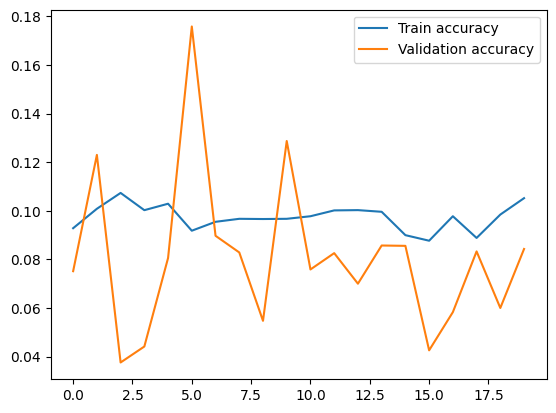

In [27]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [28]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 5ms/step - loss: 1.2008 - accuracy: 0.0885


[1.2008470296859741, 0.08846666663885117]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [29]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same', input_shape=(32, 32, 3)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))


model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.4))

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [30]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

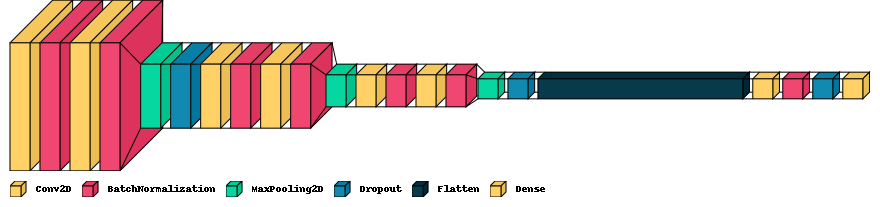

In [31]:
visualkeras.layered_view(model2, legend=True)

In [32]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [34]:
steps = int(X_train.shape[0] / 32)
history = model2.fit(augmented_images, steps_per_epoch = steps, epochs=15,validation_data = validation_data)

Epoch 1/15
1093/1093 [==============================] - 48s 44ms/step - loss: 1.7130 - accuracy: 0.0973 - val_loss: 1.5676 - val_accuracy: 0.2100
Epoch 2/15
1093/1093 [==============================] - 44s 40ms/step - loss: 1.3594 - accuracy: 0.0959 - val_loss: 1.2005 - val_accuracy: 0.0989
Epoch 3/15
1093/1093 [==============================] - 40s 37ms/step - loss: 1.1975 - accuracy: 0.0997 - val_loss: 1.0871 - val_accuracy: 0.0876
Epoch 4/15
1093/1093 [==============================] - 38s 35ms/step - loss: 1.0947 - accuracy: 0.1001 - val_loss: 1.0181 - val_accuracy: 0.0687
Epoch 5/15
1093/1093 [==============================] - 40s 37ms/step - loss: 1.0135 - accuracy: 0.1022 - val_loss: 0.8954 - val_accuracy: 0.0827
Epoch 6/15
1093/1093 [==============================] - 43s 39ms/step - loss: 0.9531 - accuracy: 0.1019 - val_loss: 0.8331 - val_accuracy: 0.0979
Epoch 7/15
1093/1093 [==============================] - 40s 37ms/step - loss: 0.8965 - accuracy: 0.1007 - val_loss: 0.8419 -

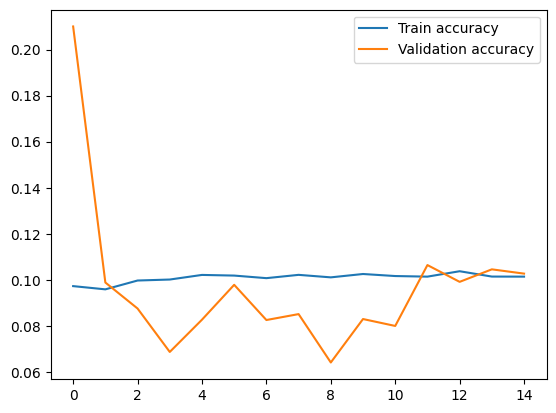

In [36]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [37]:
model2.evaluate(X_test,Y_test)

469/469 [==============================] - 2s 5ms/step - loss: 0.6146 - accuracy: 0.1015


[0.6146494150161743, 0.10146666318178177]

# Model4

In [40]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(32,32,3)))
model4.add(tf.keras.layers.MaxPooling2D((2, 2)))

model4.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3)))
model4.add(tf.keras.layers.MaxPooling2D((2, 2)))

model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(64, activation='relu'))
model4.add(tf.keras.layers.Dropout(0.2))

model4.add(tf.keras.layers.Dense(128, activation='softmax'))



In [ ]:
model4.summary()

In [41]:
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [42]:
steps = int(X_train.shape[0] / 128)
history = model4.fit(augmented_images, steps_per_epoch = steps, epochs=5,validation_data = validation_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


273/273 [==============================] - 16s 53ms/step - loss: 2.4302 - accuracy: 0.1121 - val_loss: 1.9816 - val_accuracy: 0.1530
Epoch 2/5
273/273 [==============================] - 12s 45ms/step - loss: 1.9705 - accuracy: 0.1106 - val_loss: 1.8977 - val_accuracy: 0.2310
Epoch 3/5
273/273 [==============================] - 12s 45ms/step - loss: 1.8546 - accuracy: 0.1166 - val_loss: 1.7699 - val_accuracy: 0.1516
Epoch 4/5
273/273 [==============================] - 12s 44ms/step - loss: 1.7843 - accuracy: 0.1039 - val_loss: 1.6527 - val_accuracy: 0.0769
Epoch 5/5
273/273 [==============================] - 13s 47ms/step - loss: 1.7312 - accuracy: 0.1048 - val_loss: 1.6274 - val_accuracy: 0.1041
